In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler

In [3]:
import xgboost as xgb

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import category_encoders
from sklearn.decomposition import PCA

In [54]:
import matplotlib.pyplot as plt

In [5]:
features = pd.read_csv('features_10.csv')
kaggle = pd.read_csv('trocafone_kaggle_test.csv')
labels = pd.read_csv('labels_training_set.csv')

In [63]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38829 entries, 0 to 38828
Columns: 141 entries, person to precio_mas_barato_que_vio
dtypes: bool(46), float64(6), int64(75), object(14)
memory usage: 29.8+ MB


In [6]:
training = labels.set_index('person').join(features.set_index('person'))
train_labels = training['label']
train_data = training.drop('label',axis=1)

In [7]:
predict_data = kaggle.set_index('person').join(features.set_index('person'))

In [8]:
encoder = category_encoders.TargetEncoder(smoothing=True)
train_data_enc = encoder.fit_transform(np.array(train_data),np.array(train_labels))
predict_data_enc = encoder.transform(np.array(predict_data))

In [66]:
pca = PCA(n_components = 140)

In [67]:
scaler = StandardScaler()
train_data_pca = pca.fit_transform(scaler.fit_transform(train_data_enc.fillna(0)))
predict_data_pca = pca.fit_transform(scaler.fit_transform(predict_data_enc.fillna(0)))

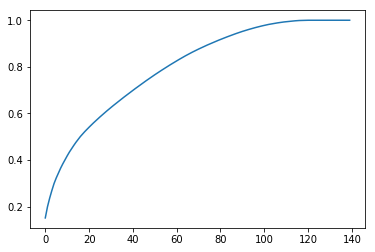

In [68]:
plt.plot(np.cumsum(pca.singular_values_**2)/sum(pca.singular_values_**2))

In [69]:
pca = PCA(n_components = 110)

In [70]:
scaler = StandardScaler()
train_data_pca = pca.fit_transform(scaler.fit_transform(train_data_enc.fillna(0)))
predict_data_pca = pca.fit_transform(scaler.fit_transform(predict_data_enc.fillna(0)))

In [49]:
xtrain,xtest,ytrain,ytest = train_test_split(train_data_pca,np.array(train_labels))

In [71]:
train = xgb.DMatrix(data=xtrain,label=ytrain)
test = xgb.DMatrix(data=xtest,label=ytest)
data = xgb.DMatrix(data=train_data_pca,label=np.array(train_labels))
pred = xgb.DMatrix(data=predict_data_pca)
params = {'colsample_bytree': 0.9,
 'gamma': 2,
 'learning_rate': 0.016238752458245277,
 'max_depth': 13,
 'min_child_weight': 5,
 'n_estimators': 100,
 'subsample': 0.7847190225361189,
 'eval_metric':'auc'}

In [72]:
bst = xgb.train(params,train,200,[(train,'train'),(test,'eval')])

[03:06:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 314 pruned nodes, max_depth=13
[0]	train-auc:0.852466	eval-auc:0.819922
[03:06:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 342 pruned nodes, max_depth=13
[1]	train-auc:0.866733	eval-auc:0.839307
[03:06:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 320 pruned nodes, max_depth=9
[2]	train-auc:0.877521	eval-auc:0.841774
[03:06:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 354 pruned nodes, max_depth=12
[3]	train-auc:0.883242	eval-auc:0.842566
[03:06:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 284 pruned nodes, max_depth=12
[4]	train-auc:0.889501	eval-auc:0.846325
[03:06:35] C:\Users\Admin

[03:06:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 322 pruned nodes, max_depth=12
[42]	train-auc:0.909725	eval-auc:0.857917
[03:06:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 300 pruned nodes, max_depth=12
[43]	train-auc:0.910042	eval-auc:0.857735
[03:06:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 456 pruned nodes, max_depth=7
[44]	train-auc:0.909782	eval-auc:0.85764
[03:06:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 338 pruned nodes, max_depth=12
[45]	train-auc:0.911029	eval-auc:0.858222
[03:06:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 354 pruned nodes, max_depth=7
[46]	train-auc:0.911138	eval-auc:0.85868
[03:06:40] C:\Users\Admi

[03:06:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 366 pruned nodes, max_depth=9
[84]	train-auc:0.917289	eval-auc:0.858329
[03:06:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 418 pruned nodes, max_depth=7
[85]	train-auc:0.917334	eval-auc:0.858494
[03:06:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 352 pruned nodes, max_depth=7
[86]	train-auc:0.917652	eval-auc:0.858835
[03:06:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 434 pruned nodes, max_depth=8
[87]	train-auc:0.917734	eval-auc:0.858793
[03:06:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 470 pruned nodes, max_depth=1
[88]	train-auc:0.917716	eval-auc:0.858806
[03:06:45] C:\Users\Admini

[03:06:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 440 pruned nodes, max_depth=4
[126]	train-auc:0.923151	eval-auc:0.861219
[03:06:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 434 pruned nodes, max_depth=0
[127]	train-auc:0.923151	eval-auc:0.861219
[03:06:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 336 pruned nodes, max_depth=8
[128]	train-auc:0.923132	eval-auc:0.86126
[03:06:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 452 pruned nodes, max_depth=11
[129]	train-auc:0.923154	eval-auc:0.861273
[03:06:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 492 pruned nodes, max_depth=5
[130]	train-auc:0.923192	eval-auc:0.861585
[03:06:49] C:\Users\Ad

[03:06:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 294 pruned nodes, max_depth=0
[168]	train-auc:0.925742	eval-auc:0.862485
[03:06:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 450 pruned nodes, max_depth=0
[169]	train-auc:0.925742	eval-auc:0.862485
[03:06:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 382 pruned nodes, max_depth=0
[170]	train-auc:0.925742	eval-auc:0.862485
[03:06:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 454 pruned nodes, max_depth=11
[171]	train-auc:0.926202	eval-auc:0.862586
[03:06:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 358 pruned nodes, max_depth=5
[172]	train-auc:0.926242	eval-auc:0.862701
[03:06:53] C:\Users\Ad

In [ ]:
bst = xgb.train(params,data,200,verbose_eval=False)

In [45]:
xg_prediction = bst.predict(pred)

In [46]:
submit = kaggle.set_index('person')

In [47]:
submit['label'] = xg_prediction

In [48]:
submit.to_csv('submit.csv')